In [122]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [65]:
max_letters = 16
input_shape = (32,320)

In [66]:
def get_crop_boundaries(img, trashold=250):
    top = 0
    bottom =0
    left = 0
    right = 0
    for i in range(img.shape[0]):
        if img[i,:].mean() > trashold:
            top = i
        else:
            break
    for i in range(img.shape[0]):
        if img[-i,:].mean() > trashold:
            bottom = i
        else:
            break
    for i in range(img.shape[1]):
        if img[:,i].mean() > trashold:
            left = i
        else:
            break
    for i in range(img.shape[1]):
        if img[:,-i].mean() > trashold:
            right = i
        else:
            break
    left = max(1,left)
    right = max(1,right)
    top = max(1,top)
    bottom = max(1,bottom)

    return left, right, top, bottom

604 598 369 1983
(8065, 1402)


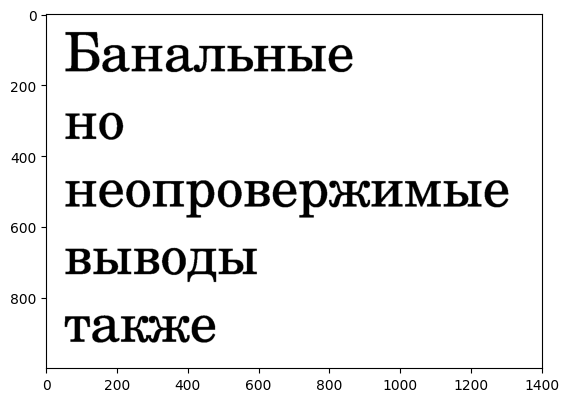

In [67]:
words_img_gr = cv2.imread('../data/words.png', 0)
word_test = cv2.imread('../data/word8.jpg', 0)

l,r,t,b = np.array(get_crop_boundaries(words_img_gr, 254))-50
print(l,r,t,b)
if l<1:
    l=1
if r<1:
    r=1
if t<1:
    t=1
if b<1:
    b=1
words_img_gr = words_img_gr[t:-b,l:-r]

plt.imshow(words_img_gr[:1000], cmap='gray')
print(words_img_gr.shape)
plt.show()

(202, 1402)
(4, 486, 1, 1) (202, 1402)
16
(212, 1402)
(4, 1134, 46, 1) (212, 1402)
4
(212, 1402)
(4, 45, 45, 1) (212, 1402)
26
(212, 1402)
(4, 595, 1, 1) (212, 1402)
17
(212, 1402)
(2, 874, 42, 1) (212, 1402)
8
(212, 1402)
(2, 411, 41, 1) (212, 1402)
16
(212, 1402)
(4, 304, 40, 1) (212, 1402)
20
(212, 1402)
(3, 400, 39, 1) (212, 1402)
17
(212, 1402)
(1, 842, 1, 1) (212, 1402)
6
(212, 1402)
(1, 530, 2, 1) (212, 1402)
18
(212, 1402)
(5, 285, 1, 1) (212, 1402)
19
(212, 1402)
(4, 394, 1, 1) (212, 1402)
17
(212, 1402)
(4, 1210, 37, 2) (212, 1402)
2
(212, 1402)
(5, 274, 1, 1) (212, 1402)
25
(212, 1402)
(4, 691, 1, 1) (212, 1402)
10
(212, 1402)
(4, 1141, 31, 3) (212, 1402)
3
(212, 1402)
(4, 1056, 30, 4) (212, 1402)
5
(212, 1402)
(4, 597, 29, 5) (212, 1402)
12
(212, 1402)
(5, 511, 28, 1) (212, 1402)
16
(212, 1402)
(4, 938, 27, 1) (212, 1402)
9
(212, 1402)
(4, 231, 26, 1) (212, 1402)
21
(212, 1402)
(4, 251, 25, 1) (212, 1402)
20
(212, 1402)
(2, 763, 1, 1) (212, 1402)
12
(212, 1402)
(7, 698, 23,

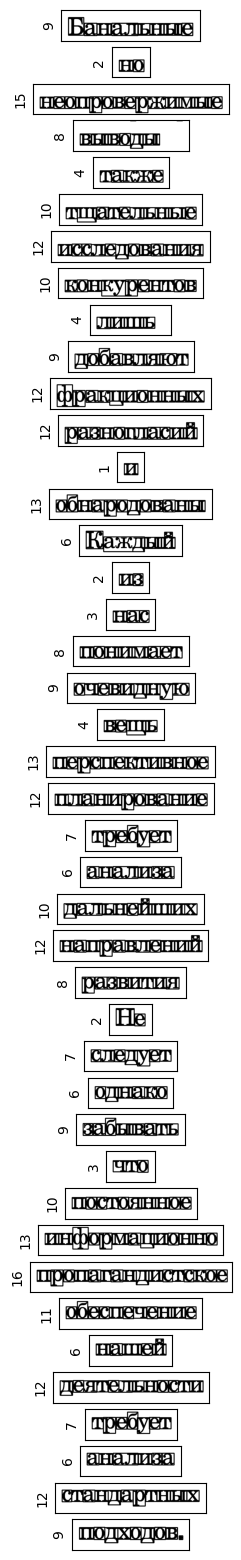

In [218]:
num_words = 42
threshold = 254
line_h = int(words_img_gr.shape[0]/num_words)

words_data = []
bb_data = []



fig, ax = plt.subplots(nrows=num_words, ncols=1, figsize=(20,20))
for i in range(num_words):
    t = max(0,line_h*(i)-10)
    b = min(words_img_gr.shape[0], line_h*(i+1)+10)
    
    img = words_img_gr[t:b,:]
    print(img.shape)
    
    l,r,t,b = np.array(get_crop_boundaries(img, threshold))-50
    
    
    if t+b>=img.shape[0]//2:
        t=b=1
    if l+r>=img.shape[1]:
        l=r=1
    if l<1:
        l=1
    if r<1:
        r=1
    if t<1:
        t=1
    if b<1:
        b=1
    
    
    print((l,r,t,b), img.shape)

    img = img[:,l:-r]
    
    orig = img.copy()
    words_data.append(img[:,:,np.newaxis])
    
    
    
    img = cv2.erode(img, np.ones((3,3), np.uint8)*255, iterations=1)
    contours, hierarchy = cv2.findContours(img.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
    print(len(contours))

    hir = hierarchy[0, :, 3]
    
    inner_conts = []
    
    output = np.zeros_like(img.copy())+255
    box = []
    for idx, contour in enumerate(contours):
        if hir[idx] == 0:
            (x, y, w, h) = cv2.boundingRect(contour)
            box.append((x, y, w, h))
            cv2.rectangle(orig, (x, y), (x + w, y + h), (0, 0, 0), 5) 
            inner_conts.append(contour)
    box.sort(key= lambda b: b[0])
    bb_data.append(box)
    ax[i].imshow(cv2.drawContours(np.zeros_like(img)+255, contours, -1, (0,0,0), 1), cmap='gray')
    ax[i].imshow(orig, cmap='gray')
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].set_ylabel(len(box))

In [69]:
shapes = []
boxes=[]
for i in range(0,len(bb_data)):
    shapes.append(words_data[i].shape[:2])
    boxes.append(len(bb_data[i]))
    print(words_data[i].shape, len(bb_data[i]))
shapes = np.array(shapes)
print(shapes.max(axis=0), max(boxes))

(202, 912, 1) 9
(212, 264, 1) 2
(212, 1353, 1) 15
(212, 803, 1) 8
(212, 526, 1) 4
(212, 989, 1) 10
(212, 1094, 1) 12
(212, 999, 1) 10
(212, 559, 1) 4
(212, 871, 1) 9
(212, 1112, 1) 12
(212, 1004, 1) 12
(212, 188, 1) 1
(212, 1123, 1) 13
(212, 707, 1) 6
(212, 257, 1) 2
(212, 342, 1) 3
(212, 801, 1) 8
(212, 886, 1) 9
(212, 460, 1) 4
(212, 1167, 1) 13
(212, 1147, 1) 12
(212, 637, 1) 7
(212, 697, 1) 6
(212, 1011, 1) 10
(212, 1072, 1) 12
(212, 764, 1) 8
(212, 296, 1) 2
(212, 646, 1) 7
(212, 589, 1) 6
(212, 752, 1) 9
(212, 338, 1) 3
(212, 914, 1) 10
(212, 1283, 1) 13
(212, 1397, 1) 16
(212, 989, 1) 11
(212, 577, 1) 6
(212, 1079, 1) 12
(212, 637, 1) 7
(212, 697, 1) 6
(212, 1043, 1) 12
(203, 778, 1) 9
[ 212 1397] 16


(202, 912, 1)
(49, 49, 100, 115)
(153, 86, 82, 80)
(236, 88, 91, 76)
(333, 86, 171, 80)
(507, 88, 76, 76)
(582, 88, 92, 76)
(677, 88, 74, 76)
(745, 88, 44, 76)
(793, 86, 71, 80)


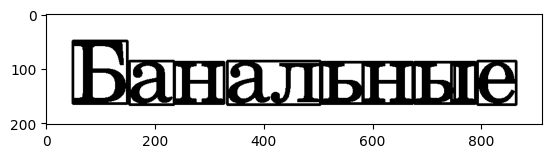

In [70]:
test_img = words_data[0].copy()
print(test_img.shape)

for box in bb_data[0]:
    print(box)
    x,y,w,h = box
    if w*h>10:
        cv2.rectangle(test_img, (x, y), (x + w, y + h), (0, 0, 0), 3) 
plt.imshow(test_img, cmap='gray')

In [71]:
def prepare_word_image(word, target_shape=input_shape):

    h,w = word.shape[:2]
    
    
        
    if w >= h * (target_shape[1]/target_shape[0]):
        high = w * (target_shape[0]/target_shape[1])
        width = w
    else:
        high = h
        width = h * (target_shape[1]/target_shape[0])
    
    h_scale, w_scale = np.array(target_shape) / [high,width]
    
    high = int(high)
    width = int(width)
    
    blank = np.zeros((high, width), dtype=np.uint8)+255
    
    if h<high:
        y_pos = (high-h)//2
    else:
        y_pos = 0    
    
    blank[y_pos:y_pos+h,:w]=word[:,:,0]
    
    
    
    img = cv2.resize(blank, (target_shape[1],target_shape[0]) , interpolation=cv2.INTER_AREA)
    
    return img, h_scale, w_scale, y_pos

def prepare_bb_data(bb_list, h_scale, w_scale,y_pos, max_len=max_letters):
    num_bb = len(bb_list)
    new_bb_list = list(bb_list.copy())
    if num_bb < max_len:
        new_bb_list += [(0,-y_pos,0,0)]*(max_len-num_bb)
    new_bb_list = np.array(new_bb_list)
    new_bb_list[:,1]+=y_pos
    new_bb_list=new_bb_list*((w_scale, h_scale)*2)
    return new_bb_list

def prepare_data(word, bb_list, target_shape=input_shape,  max_len=max_letters):
    img, h_scale, w_scale, y_pos = prepare_word_image(word, target_shape)
    bb = prepare_bb_data(bb_list, h_scale, w_scale, y_pos, max_len)
    
    return img, bb

In [72]:
words_data1, bb_data1 =[], []
for i in range(len(words_data)):
    img, bb = prepare_data(words_data[i], bb_data[i])
    words_data1.append(img)
    bb_data1.append(bb)
words_data1 = np.array(words_data1)
bb_data1 = np.array(bb_data1)
words_data1.shape, bb_data1.shape

((42, 32, 320), (42, 16, 4))

(32, 320)
[ 7.76237624  7.76237624 15.84158416 18.21782178]
[24.23762376 13.62376238 12.99009901 12.67326733]
[37.38613861 13.94059406 14.41584158 12.03960396]
[52.75247525 13.62376238 27.08910891 12.67326733]
[80.31683168 13.94059406 12.03960396 12.03960396]
[92.1980198  13.94059406 14.57425743 12.03960396]
[107.24752475  13.94059406  11.72277228  12.03960396]
[118.01980198  13.94059406   6.97029703  12.03960396]
[125.62376238  13.62376238  11.24752475  12.67326733]
[0. 0. 0. 0.]
[0. 0. 0. 0.]
[0. 0. 0. 0.]
[0. 0. 0. 0.]
[0. 0. 0. 0.]
[0. 0. 0. 0.]
[0. 0. 0. 0.]


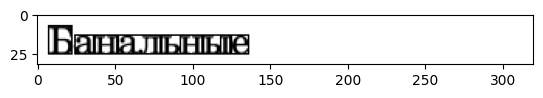

In [121]:
test_img = words_data1[0].copy()
print(test_img.shape)

for box in bb_data1[0]:
    print(box)
    x,y,w,h = np.array(box).astype(int)
    if w*h>10:
        cv2.rectangle(test_img, (x, y), (x + w, y + h), (0, 0, 0), 1) 
plt.imshow(test_img, cmap='gray')

In [213]:
for i in range(len(words_data1)):
    img = words_data1[i]*255
    cv2.imwrite('../data/prepared/imgs/word_{i}.jpg'.format(i=i), img)
    boxes = pd.DataFrame(bb_data1[i], columns=['x','y','w','h'])
    boxes = boxes.replace(0,np.nan)
    boxes = boxes.dropna(axis=0)
    boxes.to_csv('../data/prepared/bboxes/word_{i}.csv'.format(i=i))

array([[255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       ...,
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.]])

array([[<Axes: title={'center': '0'}>]], dtype=object)

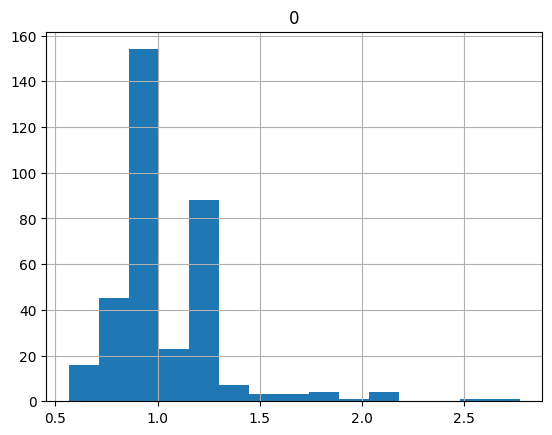

In [136]:
b = bb_data1[:,:,3].copy()
b[b==0]=1
df = pd.DataFrame((bb_data1[:,:,2]/b).reshape(42*16,))
df = df.replace(0, np.nan)
df = df.dropna()
df.hist(bins=15)

In [148]:
aspect_ratios = [0.9,1.0,1.1,1.5]

In [190]:
def IoU(box1,box2):
    
    if box1[0]<box2[0]:
        xmin, xmax = box1[0], box2[0]
        wmin, wmax = box1[2], box2[2]
    else:
        xmin, xmax = box2[0], box1[0]
        wmin, wmax = box2[2], box1[2]
        
    if box1[1]<box2[1]:
        ymin, ymax = box1[1], box2[1]
        hmin, hmax = box1[3], box2[3]
    else:
        ymin, ymax = box2[1], box1[1]
        hmin, hmax = box2[3], box1[3]
        
    if ymax-ymin>(hmin+hmax)/2 or xmax-xmin > (wmin+wmax)/2:
        intersection = 0
    else:        
        intersection = (ymin-ymax+(hmin+hmax)/2)*(xmin-xmax+(wmin+wmax)/2)
    union = wmin*hmin+wmax*hmax - intersection

    return intersection/union 

def get_best_shifts(anchor_box, boxes):
    IoUs = np.array(list(map(lambda b:IoU(b,anchor_box), boxes)))
    best_box = boxes[IoUs.argmax(axis=0)]   
    return best_box - anchor_box

def get_anchor_boxes_shifts(i,j, boxes, scale=1, base_size=15, aspect_ratios=aspect_ratios):
    x,y = i*scale, j*scale
    
    boxes = boxes[boxes.sum(axis=-1)>0]
    
    shifts = []
    h = base_size*scale
    
    for ar in aspect_ratios:
        w = h*ar
        
        box = np.array([x,y,w,h])
        shifts.append(get_best_shifts(box, boxes))
    return np.array(shifts)/scale

In [191]:
np.array(get_anchor_boxes_shifts(0,0, bb_data1[0]))

array([[ 7.76237624,  7.76237624,  2.34158416,  3.21782178],
       [ 7.76237624,  7.76237624,  0.84158416,  3.21782178],
       [ 7.76237624,  7.76237624, -0.65841584,  3.21782178],
       [ 7.76237624,  7.76237624, -6.65841584,  3.21782178]])

In [192]:
bb_data1[0]

array([[  7.76237624,   7.76237624,  15.84158416,  18.21782178],
       [ 24.23762376,  13.62376238,  12.99009901,  12.67326733],
       [ 37.38613861,  13.94059406,  14.41584158,  12.03960396],
       [ 52.75247525,  13.62376238,  27.08910891,  12.67326733],
       [ 80.31683168,  13.94059406,  12.03960396,  12.03960396],
       [ 92.1980198 ,  13.94059406,  14.57425743,  12.03960396],
       [107.24752475,  13.94059406,  11.72277228,  12.03960396],
       [118.01980198,  13.94059406,   6.97029703,  12.03960396],
       [125.62376238,  13.62376238,  11.24752475,  12.67326733],
       [  0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0

In [193]:
words_data1.shape

(42, 32, 320)

In [196]:
y_data = []
scale = 8
for n in range(words_data1.shape[0]):
    arr1 = []
    for i in range(0,words_data1.shape[1], scale):
        arr2 = []
        for j in range(0,words_data1.shape[2], scale):
           arr2.append(get_anchor_boxes_shifts(i,j, bb_data1[n])/([words_data1.shape[2],words_data1.shape[1]]*2))
        arr1.append(arr2)
    y_data.append(arr1)
y_data = np.array(y_data)
y_data.shape, y_data.size

((42, 4, 40, 4, 4), 107520)

In [187]:
y_data.min()

-9.82252358490566

In [188]:
words_data1 = words_data1/words_data1.max()
words_data1

array([[[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]],

       [[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]],

       [[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]],

       ...,

       [[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1.

In [189]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16

import keras

In [200]:
inputs = keras.Input(shape=(words_data1.shape[1:]))

res = keras.layers.Reshape((words_data1.shape[1:]+(1,)))(inputs)
concat = keras.layers.Concatenate()([res]*3)

vgg = VGG16(include_top=False, weights='imagenet', input_tensor=concat)
# vgg.trainable = False

boxes = keras.layers.Conv2D(y_data.shape[3]*y_data.shape[4], (1,1), activation='tanh')(vgg.layers[-7].output)
boxes = keras.layers.Reshape((y_data.shape[1:]))(boxes)
# flatten = keras.layers.Flatten()(vgg.layers[-7].output)
# 
# dense = keras.layers.Dense(1024, activation='relu')(flatten)
# dense = keras.layers.Dense(512, activation='relu')(dense)
# dense = keras.layers.Dense(256, activation='relu')(dense)
# dense = keras.layers.Dense(y_data.shape[1]*y_data.shape[2], activation='linear')(dense)

# outputs = keras.layers.Reshape(y_data.shape[1:])(dense)

model = keras.Model(inputs=inputs, outputs=boxes)
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "functional_17"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃ Param # ┃ Connected to         ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_26      │ (None, 32, 320)   │       0 │ -                    │
│ (InputLayer)        │                   │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ reshape_28          │ (None, 32, 320,   │       0 │ input_layer_26[0][0] │
│ (Reshape)           │ 1)                │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ concatenate_17      │ (None, 32, 320,   │       0 │ reshape_28[0][0],    │
│ (Concatenate)       │ 3)                │         │ reshape_28[0][0],    │
│                     │                   │         │ reshape_28[0][0]     │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ block1_conv1        │ (None, 32, 320,   │   1,792 │ concatenate_17[0][0] │
│ (Conv2D)            │ 64)               │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ block1_conv2        │ (None, 32, 320,   │  36,928 │ block1_conv1[0][0]   │
│ (Conv2D)            │ 64)               │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ block1_pool         │ (None, 16, 160,   │       0 │ block1_conv2[0][0]   │
│ (MaxPooling2D)      │ 64)               │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ block2_conv1        │ (None, 16, 160,   │  73,856 │ block1_pool[0][0]    │
│ (Conv2D)            │ 128)              │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ block2_conv2        │ (None, 16, 160,   │ 147,584 │ block2_conv1[0][0]   │
│ (Conv2D)            │ 128)              │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ block2_pool         │ (None, 8, 80,     │       0 │ block2_conv2[0][0]   │
│ (MaxPooling2D)      │ 128)              │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ block3_conv1        │ (None, 8, 80,     │ 295,168 │ block2_pool[0][0]    │
│ (Conv2D)            │ 256)              │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ block3_conv2        │ (None, 8, 80,     │ 590,080 │ block3_conv1[0][0]   │
│ (Conv2D)            │ 256)              │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ block3_conv3        │ (None, 8, 80,     │ 590,080 │ block3_conv2[0][0]   │
│ (Conv2D)            │ 256)              │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ block3_pool         │ (None, 4, 40,     │       0 │ block3_conv3[0][0]   │
│ (MaxPooling2D)      │ 256)              │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ block4_conv1        │ (None, 4, 40,     │ 1,180,… │ block3_pool[0][0]    │
│ (Conv2D)            │ 512)              │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ block4_conv2        │ (None, 4, 40,     │ 2,359,… │ block4_conv1[0][0]   │
│ (Conv2D)            │ 512)              │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 4, 40, 16) │   8,208 │ block4_conv2[0][0]   │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ reshape_29          │ (None, 4, 40, 4,  │       0 │ conv2d_9[0][0]     

 Total params: 5,283,664 (20.16 MB)

 Trainable params: 5,283,664 (20.16 MB)

 Non-trainable params: 0 (0.00 B)

In [201]:
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, min_delta = 1e-3,
                              patience=10, min_lr=1e-8)
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-4, patience=15, start_from_epoch=30)
checkpoint_filepath = f"tmp/SWIN2_checkpoint.weights.h5"
checkpoint_callback = keras.callbacks.ModelCheckpoint(
        checkpoint_filepath,
        monitor="val_loss",
        save_best_only=True,
        save_weights_only=True,
    )

callbacks = [reduce_lr, checkpoint_callback]

In [202]:
his = model.fit(words_data1, y_data,
          epochs=100,
          batch_size=8,
          shuffle=True,
          validation_split=0.1,
          callbacks=callbacks)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 504ms/step - loss: 6.4086 - val_loss: 6.0528 - learning_rate: 0.0010
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 5.8983 - val_loss: 6.0527 - learning_rate: 0.0010
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 5.9113 - val_loss: 6.0528 - learning_rate: 0.0010
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 5.8967 - val_loss: 6.0527 - learning_rate: 0.0010
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 5.9176 - val_loss: 6.0527 - learning_rate: 0.0010
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 5.9280 - val_loss: 6.0527 - learning_rate: 0.0010
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 5.9056 - val_loss: 6.0527 - learning_rate: 0.0010
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 5.9364 - val_loss: 6.0527 - learning_rate: 0.0010
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 5.9015 - val_loss: 6.0527 - learning_rate: 0.0010
Epoch 10/100
5/5 ━━━━━━━━━━

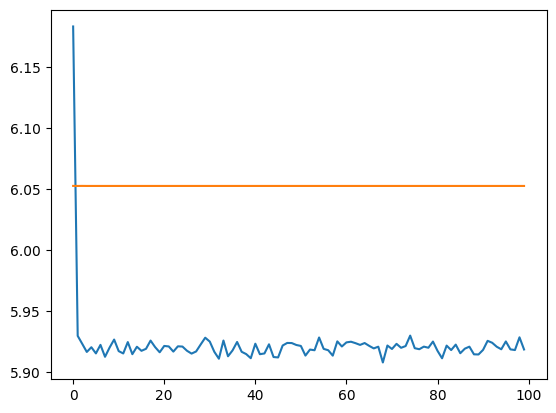

In [203]:
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])

In [110]:
model.evaluate(words_data1, y_data)

2024-02-14 14:06:34.036529: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 4.40GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-02-14 14:06:34.036563: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 4.40GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-02-14 14:06:34.177023: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 4.40GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-02-14 14:06:34.177060: W external/local_tsl/tsl/framework/bfc_

2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - loss: 0.0023


0.0023970152251422405

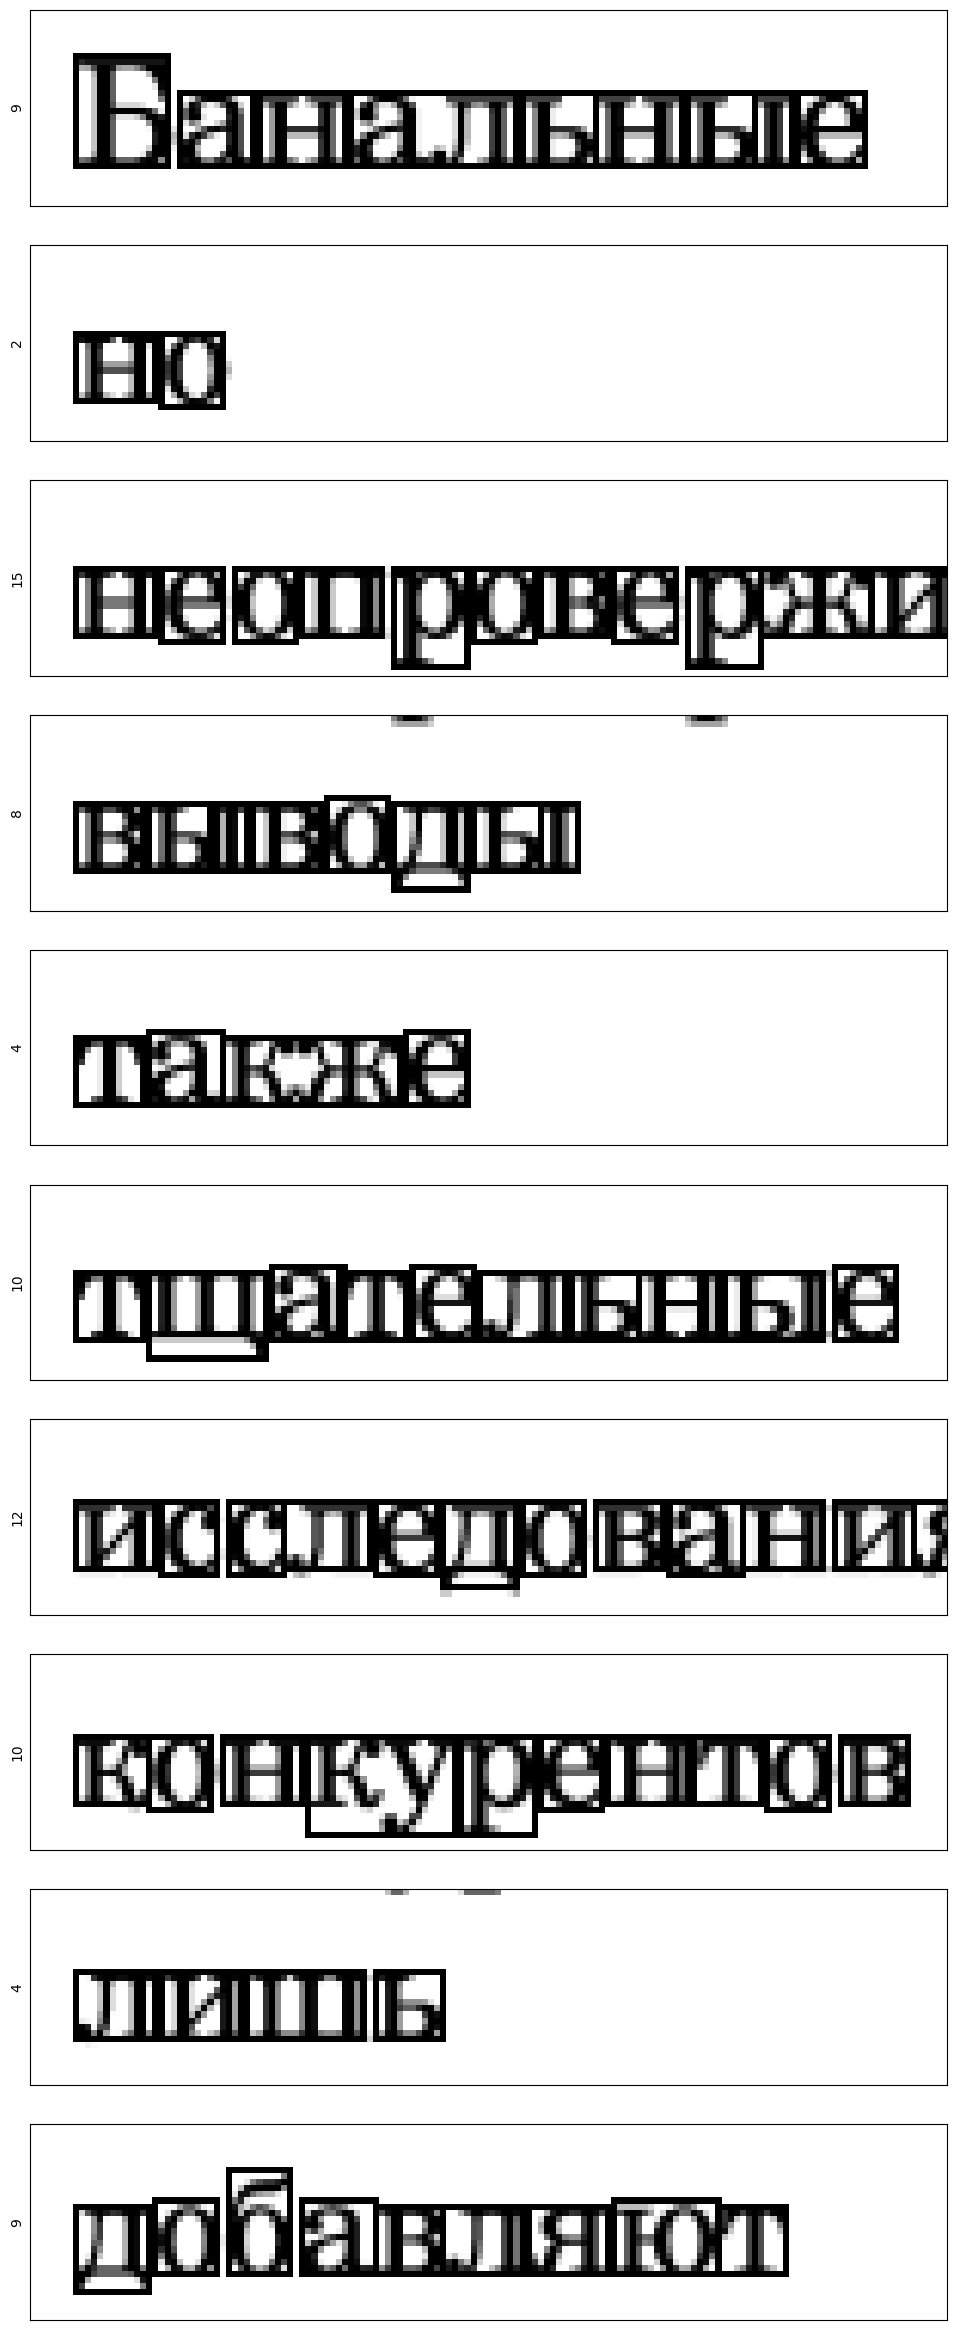

In [216]:
num_pics = 10
fig, ax = plt.subplots(nrows=num_pics, ncols=1, figsize=(20,30))
for i in range(num_pics):
    test_img = words_data1[i].copy()
    pred = bb_data1[i]
    
    for box in pred:
        x,y,w,h = np.array(box).astype(int)
        if w*h>1:
            cv2.rectangle(test_img, (x, y), (x + w, y + h), (0, 0, 0), 1) 
    ax[i].imshow(test_img[:,:150], cmap='gray')
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].set_ylabel(pred[pred.sum(axis=1)>0].shape[0])
    